<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 8</b></center>    
<center><b><h1>Patel Viraj</b></center>    
<center><b><h1>22010101148</b></center>    
<center><b><h1>28-1-25</b></center>  
<pre>    

# Step 1: Import Libraries
This step imports all necessary libraries for data processing, visualization, and machine learning.

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 2: Load the Dataset
Load Given dataset -  heart.csv

In [118]:
data = p.read_csv('heart.csv')
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [5]:
print(data.head())

print(data.info())

print(data.isnull().sum())


NameError: name 'data' is not defined

# Step 4: Univariate Analysis
Here we visualize the distribution of each feature using histograms.

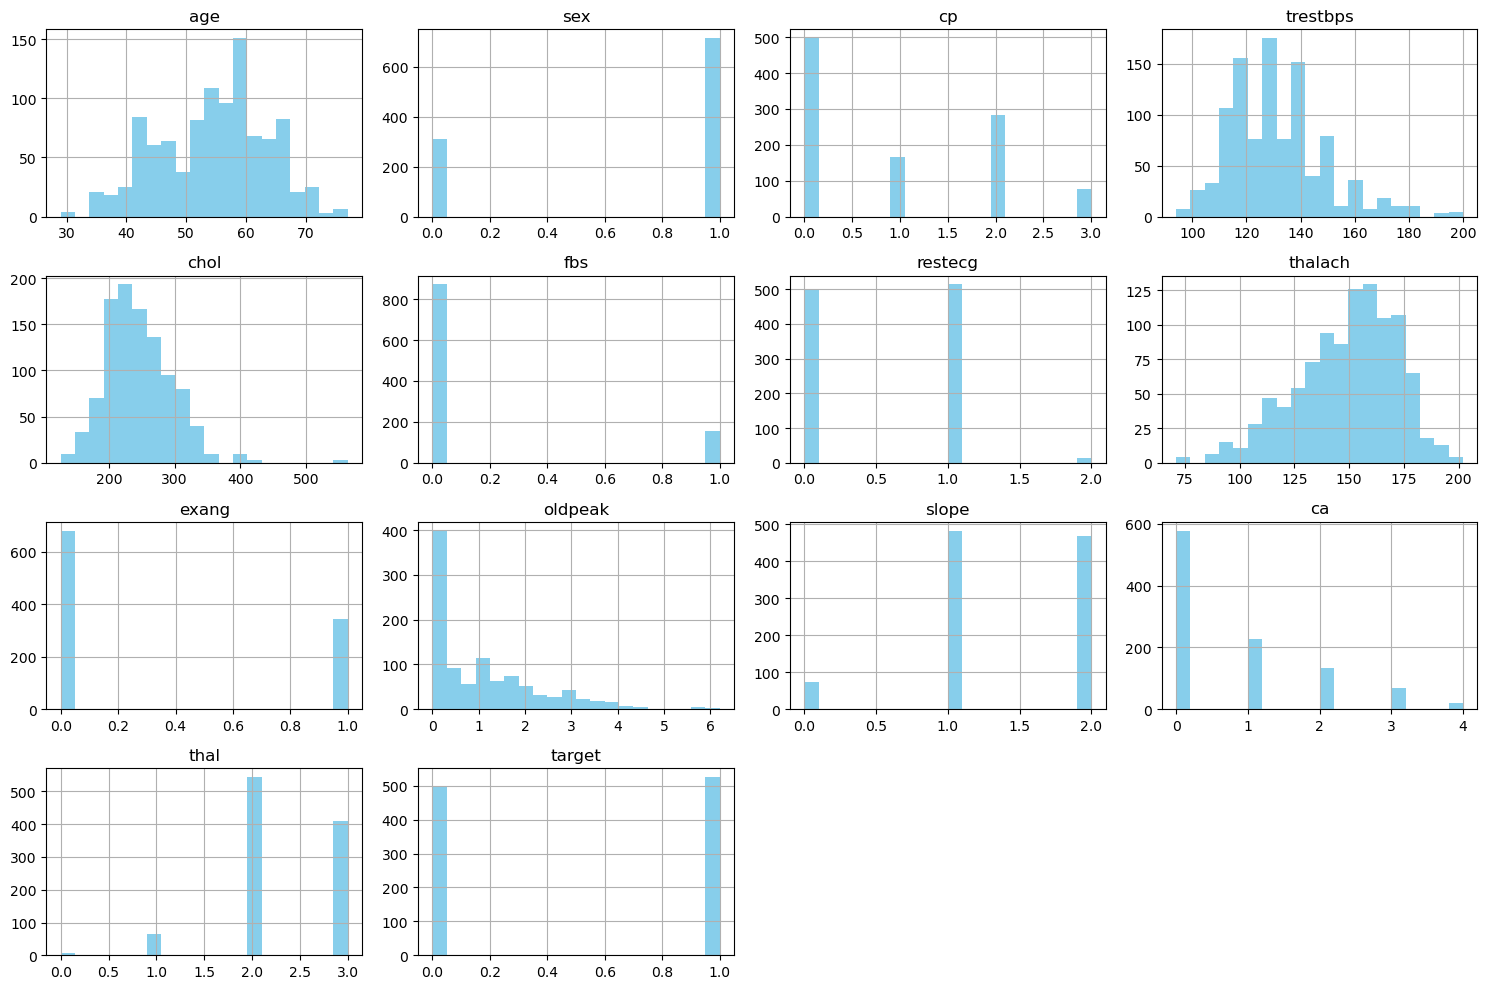

In [124]:
data.hist(figsize=(15, 10), bins=20, color='skyblue')
plt.tight_layout()
plt.show()

# Step 5: Bivariate Analysis
This step involves exploring the correlations between features using a heatmap.

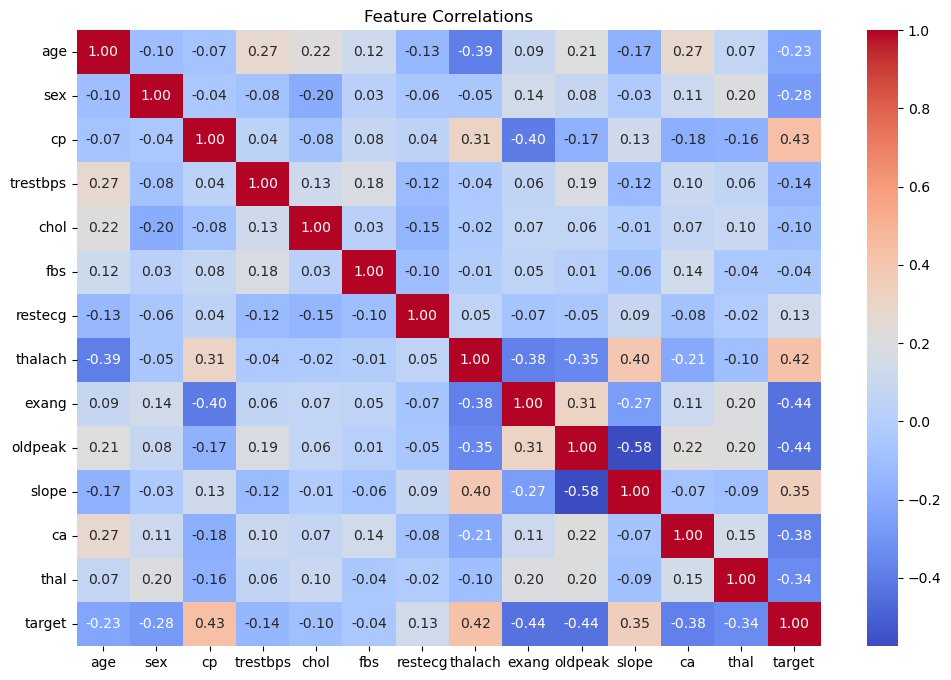

In [126]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.show()

# Step 6: Outlier Detection
We visualize potential outliers using boxplots.

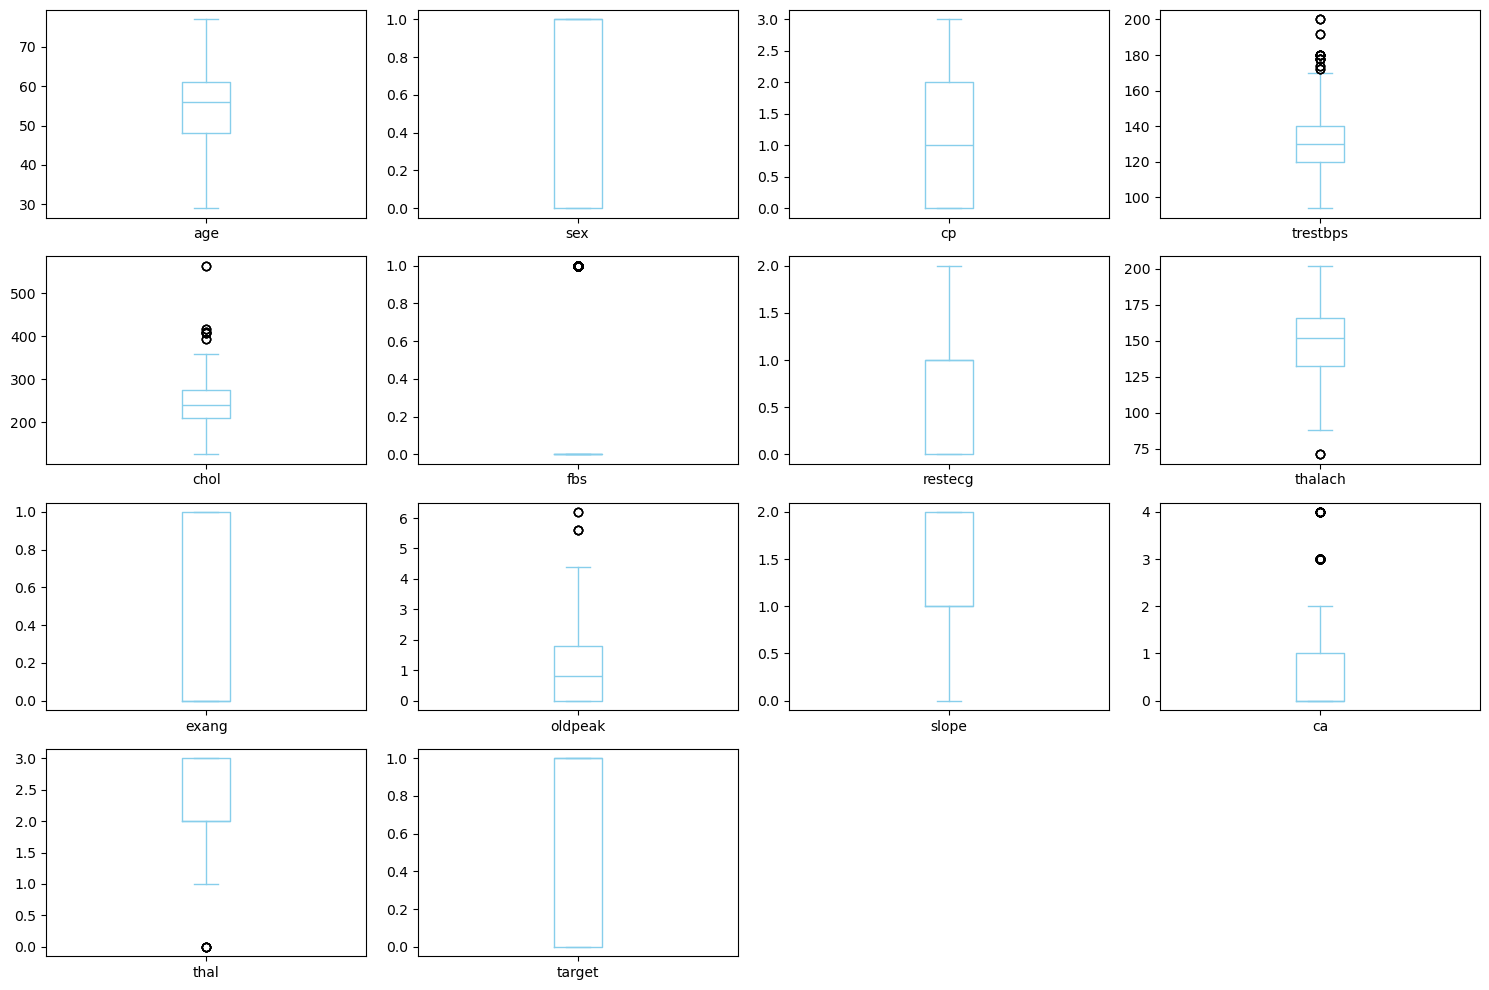

In [128]:
data.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), color='skyblue')
plt.tight_layout()
plt.show()


# Step 7: Split Data into Training and Testing Sets
The dataset is split into training and testing sets for model evaluation.

In [131]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Step 8: Train Decision Tree
We train a Decision Tree Classifier on the training data. You have to also check for KNeighborsClassifier and  GaussianNB

In [133]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [135]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [136]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

# Step 9: Evaluate Decision Tree
We evaluate the Decision Tree model using accuracy, confusion matrix, and classification report.

In [138]:
y_pred_dt = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Accuracy: 0.9707792207792207
Confusion Matrix:
 [[159   0]
 [  9 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



# Step 10: Visualize Decision Tree
Here we visualize the structure of the trained Decision Tree.

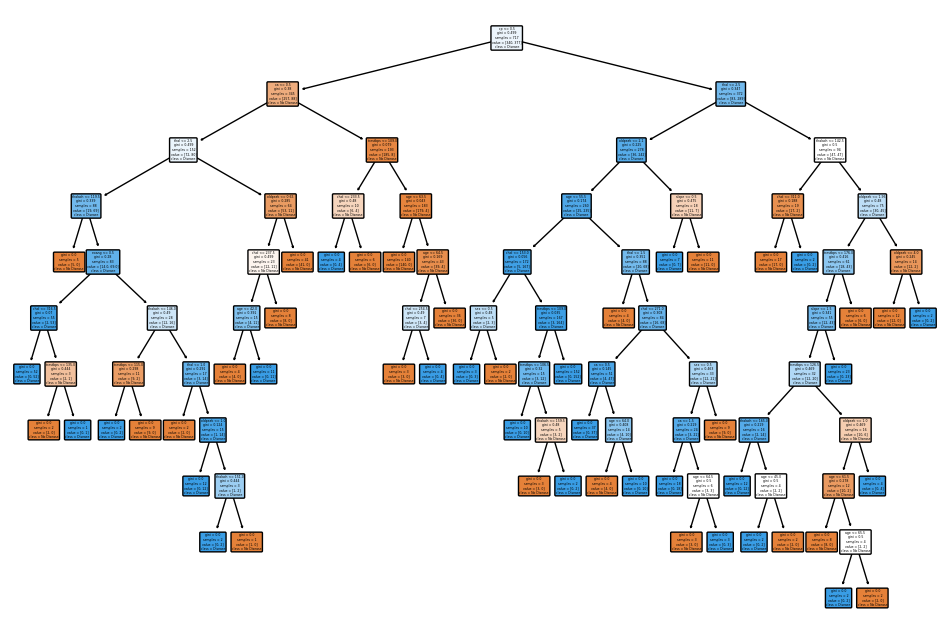

In [140]:
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True)
plt.show()


# Step 11: Train Bagging Classifier
We train a Bagging Classifier with Decision Trees as the base model.

In [142]:
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=16, random_state=42)
bagging_model.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=16,
                  random_state=42)

# Step 12: Evaluate Bagging Classifier
The Bagging model is evaluated using accuracy.

In [144]:
y_pred_bagging = bagging_model.predict(X_test)

print("Accuracy (Bagging):", accuracy_score(y_test, y_pred_bagging))


Accuracy (Bagging): 0.9902597402597403


# Step 13: Train Random Forest
We train a Random Forest Classifier on the dataset.

In [171]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Step 14: Feature Importance in Random Forest
We analyze feature importance as determined by the Random Forest model.

In [174]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))


     Feature  Importance
2         cp    0.132274
7    thalach    0.125039
11        ca    0.122912
9    oldpeak    0.122852
12      thal    0.113005
0        age    0.085554
4       chol    0.079872
3   trestbps    0.068356
10     slope    0.051335
8      exang    0.042210
1        sex    0.028721
6    restecg    0.018155
5        fbs    0.009714


# Step 15: Evaluate Random Forest
We evaluate the Random Forest model using accuracy.

In [177]:
y_pred_rf = rf_model.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))


Accuracy (Random Forest): 0.9805194805194806


# Step 16: Train AdaBoost Classifier
We train an AdaBoost Classifier on the dataset.

In [180]:
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)


D:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

# Step 17: Evaluate AdaBoost Classifier
The AdaBoost model is evaluated using accuracy.

In [183]:
y_pred_ada = ada_model.predict(X_test)

print("Accuracy (AdaBoost):", accuracy_score(y_test, y_pred_ada))


Accuracy (AdaBoost): 0.8733766233766234
